# Mean-reversion Strategies with Bollinger Bands
__Mean Reversion__: Asset price returns to its mean value when overbought/oversold.

__Bollinger Bands__: SMA (eg. 30) + upper and lower bands of 2 std away from the middle line (SMA).
- upper and lower band distance can be tuned.

In [2]:
import pandas as pd

In [3]:
# get the data
df = pd.read_csv('intraday.csv', parse_dates=['time'], index_col='time')
df

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


<AxesSubplot:xlabel='time'>

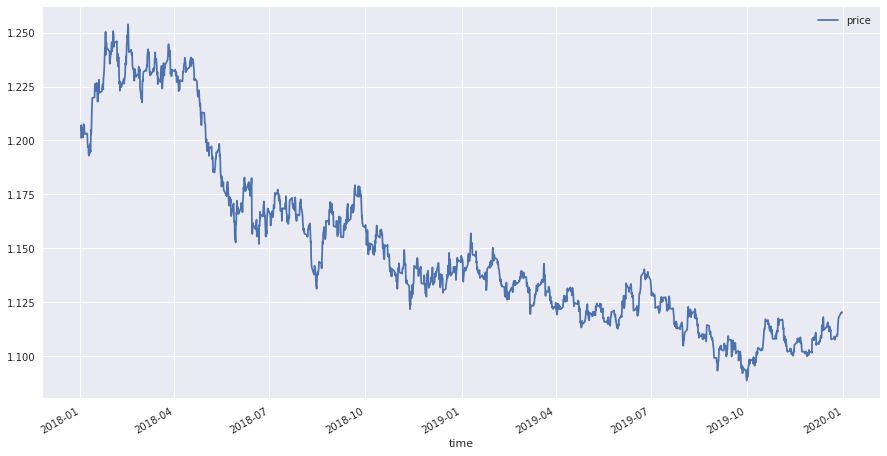

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df.plot(figsize=(15, 8))

In [6]:
# add return column
import numpy as np

df["returns"] = df.price.divide(df.price.shift(1)).apply(np.log)
df


,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [7]:
# Create constants for sma and std
SMA = 30
STD = 2

In [8]:
# Add the sma column
df["sma"] = df.price.rolling(SMA).mean()
# you must dropna after rolling because otherwise, 
# you'll have first 29 rows empty for all columns other than price and returns
# and later when you ffill or fill(0), this will distort the results
df.dropna(inplace=True)
df

,price,returns,sma
time,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777


<AxesSubplot:xlabel='time'>

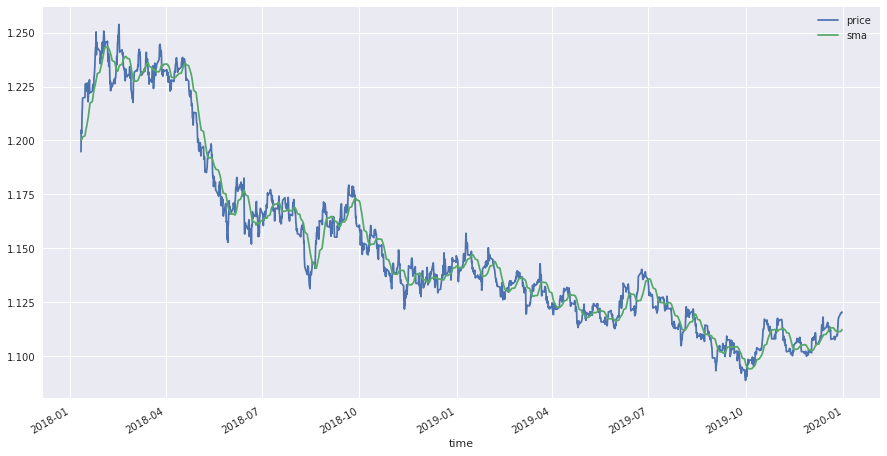

In [9]:
# Plot price and sma together
df[["price", "sma"]].plot(figsize=(15, 8))

In [10]:
# Add the lower and upper column
df["lower"] = df.sma - df.price.rolling(SMA).std().mul(STD)
df.tail()

,price,returns,sma,lower
time,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679


In [11]:
df["upper"] = df.sma + df.price.rolling(SMA).std().mul(STD)
df.tail()

,price,returns,sma,lower,upper
time,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981,1.120011
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679,1.120832


In [12]:
df.columns

Index(['price', 'returns', 'sma', 'lower', 'upper'], dtype='object')

In [13]:
color_dict = {
    "price": "black",
    "sma": "tab:orange",
    "upper": "tab:red",
    "lower": "tab:blue",
    "position": "tab:green"
}
colors = [color_dict.get(x, "tab:gray") for x in df.columns.drop('returns')]
print(df.columns)
colors

Index(['price', 'returns', 'sma', 'lower', 'upper'], dtype='object')


['black', 'tab:orange', 'tab:blue', 'tab:red']

<AxesSubplot:xlabel='time'>

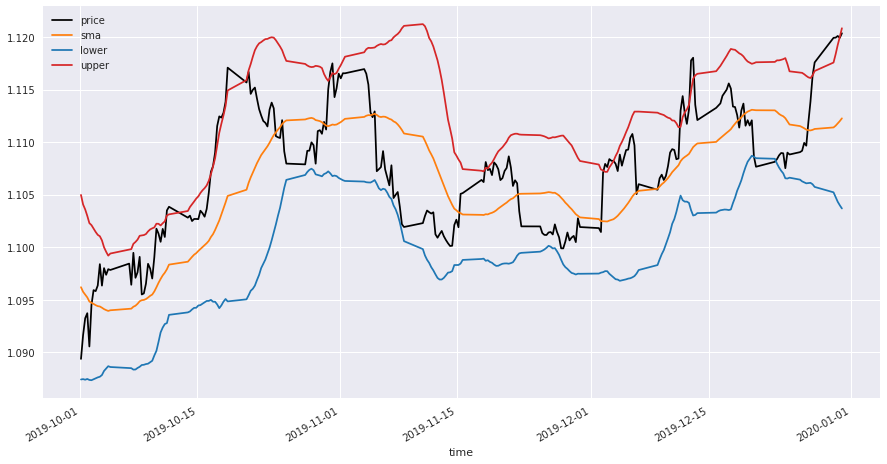

In [14]:
# See the bollinger band
start = '2019-10'
end = '2019-12'
df.drop(columns='returns').loc['2019-10': '2019-12'].plot(figsize=(15, 8), color=colors)

In [15]:
df.loc["2018-01-12 04:00"]


price      1.212530
returns    0.006093
sma        1.200748
lower           NaN
upper           NaN
Name: 2018-01-12 04:00:00+00:00, dtype: float64

In [16]:
na_free = df.dropna()
df.index.isin(na_free.index)

array([False, False, False, ...,  True,  True,  True])

In [17]:
~df.index.isin(na_free.index) # invert the binary vector

array([ True,  True,  True, ..., False, False, False])

In [18]:
# because of rolling(30), first 29 rows would've been removed with dropna() after finding sma
df[~df.index.isin(na_free.index)][:'2018-01-13'].count()

price      7
returns    7
sma        7
lower      0
upper      0
dtype: int64

In [19]:
# we had negative total return up to this point. That's why we had
# higher creturn with dropna.
df[~df.index.isin(na_free.index)][:'2018-01-13']['returns'].sum()

0.020136951180904826

In [20]:
# Add position
# df.dropna(inplace=True)
df["position"] = np.where(df.price > df.upper, -1, np.nan)
df

,price,returns,sma,lower,upper,position
time,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,NaN,NaN,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,NaN,NaN,NaN
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,NaN,NaN,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,NaN,NaN,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,-1.0


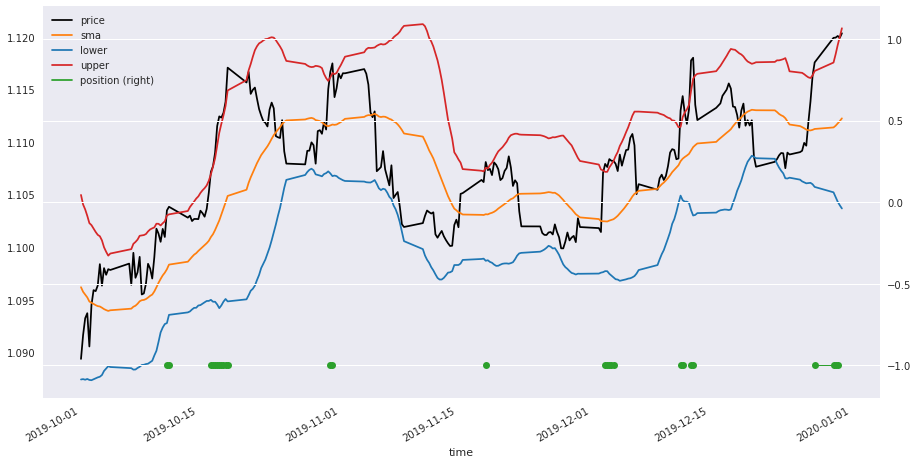

In [21]:


def draw(df: pd.DataFrame):
    ax = df.plot(figsize=(15, 8), secondary_y='position', color=['black', 'tab:orange', 'tab:blue', 'tab:red','tab:green'])
    fig = ax.get_figure()
    ax = fig.get_axes()
    ax[1].set_ylim(-1.2, 1.2)
    ax[1].lines[0].set_linewidth(1)
    ax[1].lines[0].set_marker('o')

# position only drawn where price > upper
draw(df.loc[start:end].drop(columns='returns'))

In [22]:
df.position = np.where(df.price < df.lower, 1, df.position)


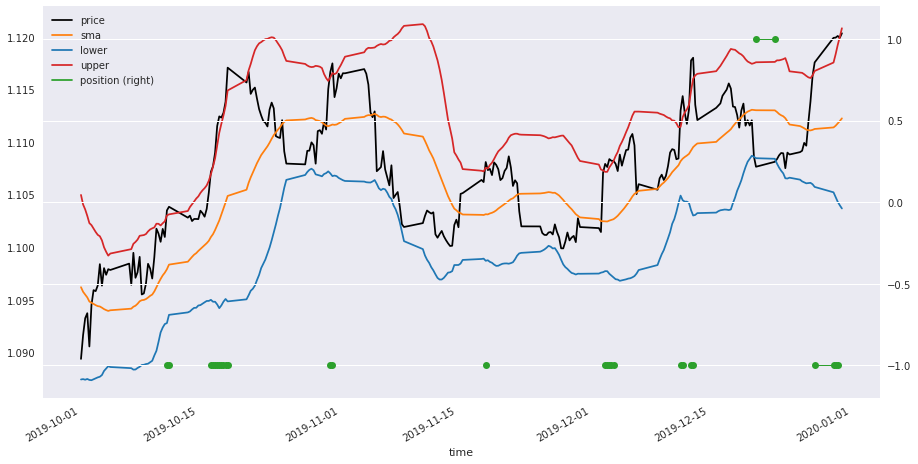

In [23]:
# Position is drawn where price < lower
draw(df.loc[start: end].drop(columns='returns'))

In [24]:
# add "hold" position
df["distance"] = df.price - df.sma

In [25]:
price_crossed_ma = df.distance * df.distance.shift(1) < 0
df.position = np.where(price_crossed_ma, 0, df.position)
df

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,NaN,NaN,NaN,-0.005734
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,NaN,NaN,0.0,0.004287
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,NaN,NaN,NaN,0.002705
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,NaN,NaN,NaN,0.004641
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,NaN,NaN,NaN,0.011782
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,-1.0,0.008387
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,-1.0,0.008318


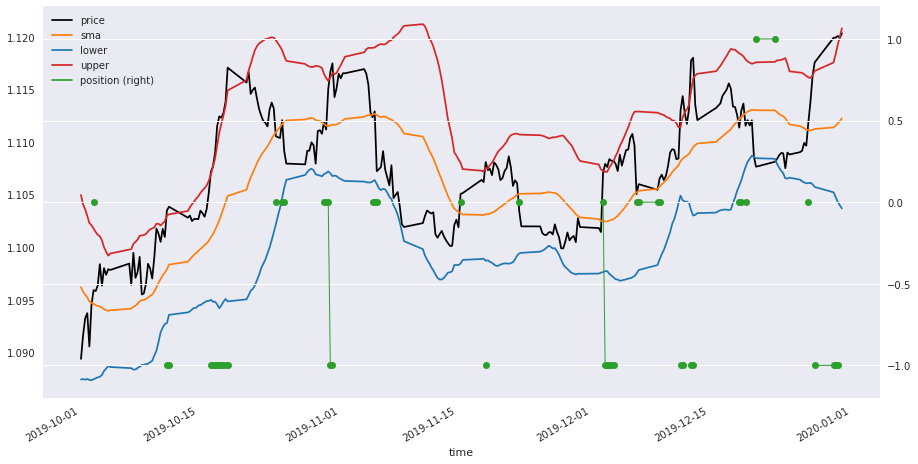

In [26]:
# Add hold position where price crosses the moving average
draw(df.loc[start:end].drop(columns=['returns', 'distance']))
plt.show()

In [27]:
# Forward fill the missing value in position
# This will:
# - extend short/long position until price crosses MA
# - extend hold position until price crosses either upper or lower bound of the Bollinger band.
df.position = df.position.ffill()
df

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,NaN,NaN,NaN,-0.005734
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,NaN,NaN,0.0,0.004287
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,NaN,NaN,0.0,0.002705
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,NaN,NaN,0.0,0.004641
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,NaN,NaN,0.0,0.011782
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,-1.0,0.008387
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,-1.0,0.008318


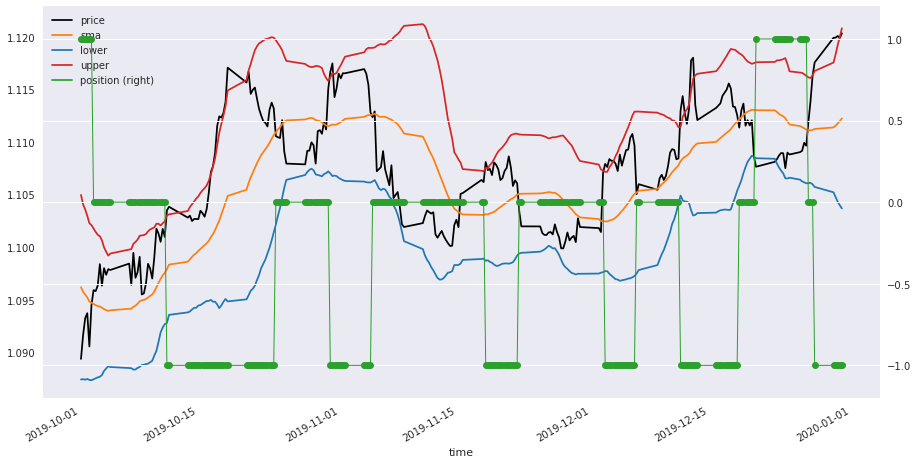

In [28]:
draw(df.loc[start: end].drop(columns=['returns', 'distance']))

In [29]:
# Now we're filling the missing values in position before the price crosses upper, lower, or MA with hold position
df.position = df.position.fillna(0)
df

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,NaN,NaN,0.0,-0.005734
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,NaN,NaN,0.0,0.004287
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,NaN,NaN,0.0,0.002705
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,NaN,NaN,0.0,0.004641
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,NaN,NaN,0.0,0.011782
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,-1.0,0.008387
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,-1.0,0.008318


In [30]:
# show the position distribution
df.position.value_counts().div(len(df)).round(2)

 0.0    0.47
 1.0    0.29
-1.0    0.24
Name: position, dtype: float64

In [31]:
df.loc['2019-5'].head(20)

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2019-05-01 03:00:00+00:00,1.122805,0.001145,1.119432,1.111407,1.127457,0.0,0.003373
2019-05-01 09:00:00+00:00,1.124030,0.001090,1.119433,1.111405,1.127461,0.0,0.004597
2019-05-01 15:00:00+00:00,1.119490,-0.004047,1.119263,1.111474,1.127052,0.0,0.000227
2019-05-01 21:00:00+00:00,1.120155,0.000594,1.119086,1.111648,1.126524,0.0,0.001069
2019-05-02 03:00:00+00:00,1.120845,0.000616,1.118924,1.111883,1.125964,0.0,0.001921
2019-05-02 09:00:00+00:00,1.118180,-0.002381,1.118697,1.112034,1.125361,0.0,-0.000517
2019-05-02 15:00:00+00:00,1.117260,-0.000823,1.118439,1.112202,1.124675,0.0,-0.001179
2019-05-02 21:00:00+00:00,1.117445,0.000166,1.118330,1.112143,1.124517,0.0,-0.000885
2019-05-03 03:00:00+00:00,1.116530,-0.000819,1.118124,1.112133,1.124114,0.0,-0.001594


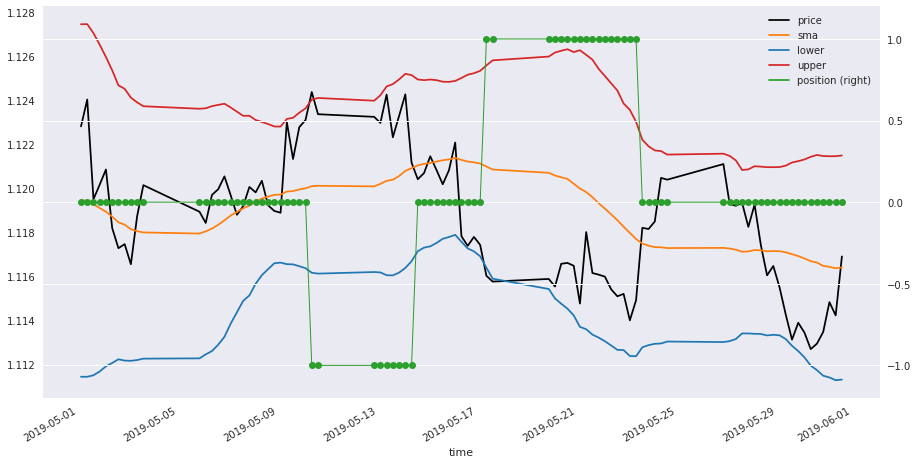

In [32]:
# Draw again with different window
draw(df.loc['2019-5'].drop(columns=['returns', 'distance']))

## Mean-reversion strategy backtesting

In [33]:
df["strategy"] = df.position.shift(1) * df["returns"]
df.head()

,price,returns,sma,lower,upper,position,distance,strategy
time,,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,NaN,NaN,0.0,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,NaN,NaN,0.0,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,NaN,NaN,0.0,0.002705,-0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,NaN,NaN,0.0,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,NaN,NaN,0.0,0.011782,0.0


In [34]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)
df.tail()


,price,returns,sma,lower,upper,position,distance,strategy,creturns,cstrategy
time,,,,,,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529,-0.002092,0.936885,1.095367
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,-1.0,0.008387,-0.000018,0.936902,1.095347
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,-1.0,0.008318,-0.000138,0.937032,1.095196
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981,1.120011,-1.0,0.007924,0.000156,0.936885,1.095367
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679,1.120832,-1.0,0.008099,-0.000388,0.937249,1.094941


In [35]:
df.loc["2018-01-12 04:00"][["returns", "creturns"]]
# creturns    1.014360 (with dropna)
# creturns    1.009428 -> without dropna, creturns dropped about 0.005


returns     0.006093
creturns    1.014360
Name: 2018-01-12 04:00:00+00:00, dtype: float64

<AxesSubplot:xlabel='time'>

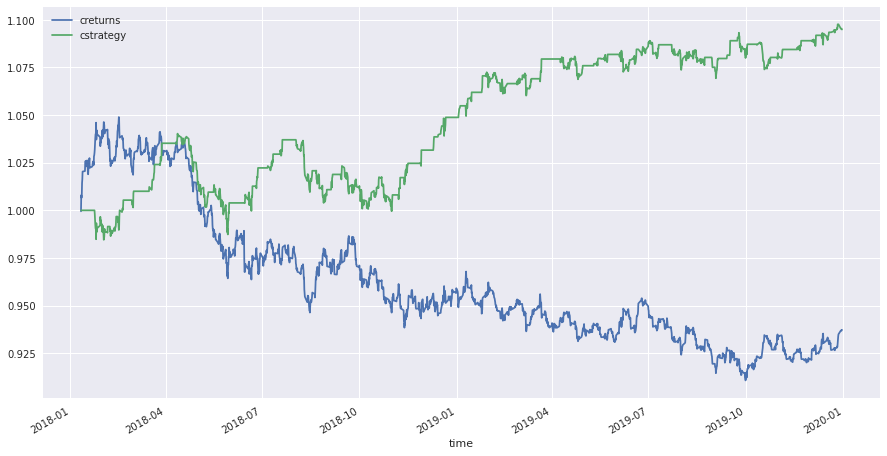

In [36]:
df[["creturns", "cstrategy"]].plot(figsize=(15, 8))

In [37]:
df

,price,returns,sma,lower,upper,position,distance,strategy,creturns,cstrategy
time,,,,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,NaN,NaN,0.0,-0.005734,NaN,0.999502,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,NaN,NaN,0.0,0.004287,0.000000,1.007989,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,NaN,NaN,0.0,0.002705,-0.000000,1.006559,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,NaN,NaN,0.0,0.004641,0.000000,1.008198,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,NaN,NaN,0.0,0.011782,0.000000,1.014360,1.000000
...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529,-0.002092,0.936885,1.095367
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,-1.0,0.008387,-0.000018,0.936902,1.095347
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,-1.0,0.008318,-0.000138,0.937032,1.095196


In [38]:
# proportional transaction cost
ptc = 0.00007

In [39]:
df["trades"] = df.position.diff().fillna(0).abs().shift(1)
df.loc[df["trades"] == 1].head(10)

,price,returns,sma,lower,upper,position,distance,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,
2018-01-24 04:00:00+00:00,1.233690,0.001834,1.224971,1.218066,1.231876,-1.0,0.008719,-0.001834,1.032061,0.998168,1.0
2018-02-05 16:00:00+00:00,1.236710,-0.004260,1.243268,1.235493,1.251042,0.0,-0.006558,-0.000000,1.034588,0.991498,1.0
2018-02-07 16:00:00+00:00,1.226300,-0.002476,1.240961,1.229607,1.252314,1.0,-0.014661,-0.002476,1.025879,0.989046,1.0
2018-02-13 16:00:00+00:00,1.235210,-0.000502,1.232831,1.218532,1.247129,0.0,0.002379,-0.000000,1.033333,0.996732,1.0
2018-02-14 22:00:00+00:00,1.245935,0.000711,1.232256,1.219424,1.245089,-1.0,0.013679,-0.000711,1.042305,0.996024,1.0
2018-02-20 10:00:00+00:00,1.234050,-0.000251,1.237857,1.220843,1.254871,0.0,-0.003807,-0.000000,1.032363,1.005364,1.0
2018-02-28 04:00:00+00:00,1.222000,-0.000299,1.231931,1.221548,1.242313,1.0,-0.009931,-0.000299,1.022282,1.005064,1.0
2018-03-02 04:00:00+00:00,1.227590,-0.000354,1.227678,1.217375,1.237981,0.0,-0.000088,-0.000000,1.026958,1.010019,1.0
2018-03-16 15:00:00+00:00,1.228950,0.002252,1.234368,1.226447,1.242289,1.0,-0.005418,0.002252,1.028096,1.012297,1.0


In [40]:
df.loc["2018-02"][16:19]

,price,returns,sma,lower,upper,position,distance,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,
2018-02-07 04:00:00+00:00,1.235065,-0.002850,1.241863,1.233070,1.250656,0.0,-0.006798,-0.000000,1.033212,0.991498,0.0
2018-02-07 10:00:00+00:00,1.229340,-0.004646,1.241457,1.231545,1.251369,1.0,-0.012117,-0.000000,1.028422,0.991498,0.0
2018-02-07 16:00:00+00:00,1.226300,-0.002476,1.240961,1.229607,1.252314,1.0,-0.014661,-0.002476,1.025879,0.989046,1.0


In [41]:
df.trades.value_counts()

0.0    1929
1.0     111
Name: trades, dtype: int64

In [42]:
df["net_strategy"] = df["strategy"].sub(df["trades"] * ptc)
df.head()

,price,returns,sma,lower,upper,position,distance,strategy,creturns,cstrategy,trades,net_strategy
time,,,,,,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,NaN,NaN,0.0,-0.005734,NaN,0.999502,NaN,NaN,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,NaN,NaN,0.0,0.004287,0.0,1.007989,1.0,0.0,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,NaN,NaN,0.0,0.002705,-0.0,1.006559,1.0,0.0,-0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,NaN,NaN,0.0,0.004641,0.0,1.008198,1.0,0.0,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,NaN,NaN,0.0,0.011782,0.0,1.014360,1.0,0.0,0.0


In [43]:
df["net_cstrategy"] = df["net_strategy"].cumsum().apply(np.exp)
df.tail()

,price,returns,sma,lower,upper,position,distance,strategy,creturns,cstrategy,trades,net_strategy,net_cstrategy
time,,,,,,,,,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529,-0.002092,0.936885,1.095367,1.0,-0.002162,1.086889
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,-1.0,0.008387,-0.000018,0.936902,1.095347,0.0,-0.000018,1.086869
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,-1.0,0.008318,-0.000138,0.937032,1.095196,0.0,-0.000138,1.086719
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981,1.120011,-1.0,0.007924,0.000156,0.936885,1.095367,0.0,0.000156,1.086889
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679,1.120832,-1.0,0.008099,-0.000388,0.937249,1.094941,0.0,-0.000388,1.086467


<AxesSubplot:xlabel='time'>

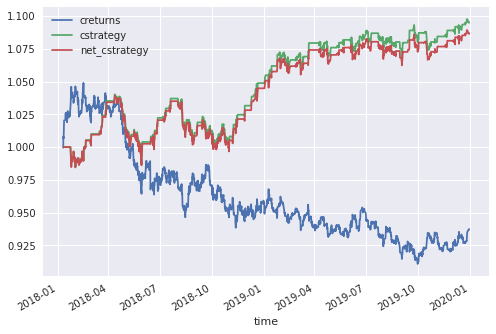

In [44]:
df[["creturns", "cstrategy", "net_cstrategy"]].plot()

In [45]:
# Get annualized returns & net strategy
df[["returns", "net_strategy"]].mean() * (4 * 255) # 255 biz days * 4 times per day

returns        -0.032387
net_strategy    0.041465
dtype: float64

In [46]:
# annualized risk
df[["returns", "net_strategy"]].std() * np.sqrt(4 * 255)

returns         0.060317
net_strategy    0.044133
dtype: float64

In [47]:
df.loc["2018-02-12 04:00"]


price            1.226390
returns         -0.001882
sma              1.236001
lower            1.217764
upper            1.254237
position         1.000000
distance        -0.009610
strategy        -0.001882
creturns         1.025954
cstrategy        0.989118
trades           0.000000
net_strategy    -0.001882
net_cstrategy    0.988911
Name: 2018-02-12 04:00:00+00:00, dtype: float64